In [24]:
import pandas as pd
import os
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
#Samples were blinded but artifacts numbers given after initial analysis was completed
sampleDict={
    'SR-0001':'Artifact 1',
    'SR-0002':'Artifact 1',
    'SR-0003':'Artifact 1',
    '1142-0004':'Artifact 2',
    'SR-0022':'Artifact 4',
    'SR-0023':'Artifact 5',
    'SR-0024':'Artifact 6',
    'SR-0004':'Control',
}

In [26]:
summaryList=[]

directory='/Users/loftum/Desktop/LeeLab/LeonardoDaVinci/JCVI/haplogroupSummariesv2/'
for file in os.listdir(directory):
    if '.DS' in file or '.yHaplo.' in file:
        continue
    else:
        print(file)

        df = pd.read_csv(directory+file,sep='\t')
        df2 = df[df['DerAlleleDP']!=0].copy()

        for row in df2.index:
            try:
                
                summaryList.append([df2.at[row, 'Sample'].split(".sg")[0], df2.at[row, 'hgID'], int(df2.at[row, 'DerAlleleDP'])])

            except:
                print(df2.at[row, 'DerAlleleDP'])

allSampleDF = pd.DataFrame(data=summaryList, columns=['Sample','hgID','DerAlleleDP'])
allSampleDF2 = allSampleDF.sort_values(by=['DerAlleleDP'], ascending=False).copy()
allSampleDF2['Artifact']=[sampleDict[x] if x in sampleDict else x for x in allSampleDF2['Sample'] ]
collapsed = (
    allSampleDF2
    .groupby(["Artifact", "hgID"], as_index=False)["DerAlleleDP"]
    .sum()
)
collapsed_renamed = collapsed.rename(columns={'Artifact': 'Sample'}).copy()
ar1df = collapsed_renamed[collapsed_renamed['Sample']=='Artifact 1'].copy()

conDF = pd.concat([ar1df,allSampleDF2]).reset_index()

SR-0025.sg5.vcf.haploLevelInfo.ISOGG.v2.csv
SR-0012.sg5.vcf.haploLevelInfo.ISOGG.v2.csv
11422-0006.sg5.vcf.haploLevelInfo.ISOGG.v2.csv
SR-0001.sg5.vcf.haploLevelInfo.ISOGG.v2.csv
11422-0009.sg5.vcf.haploLevelInfo.ISOGG.v2.csv
SR-0026.sg5.vcf.haploLevelInfo.ISOGG.v2.csv
SR-0011.sg5.vcf.haploLevelInfo.ISOGG.v2.csv
11422-0005.sg5.vcf.haploLevelInfo.ISOGG.v2.csv
SR-0002.sg5.vcf.haploLevelInfo.ISOGG.v2.csv
5540-009.sg5.vcf.haploLevelInfo.ISOGG.v2.csv
SR-0014.sg5.vcf.haploLevelInfo.ISOGG.v2.csv
SR-0023.sg5.vcf.haploLevelInfo.ISOGG.v2.csv
SR-0007.sg5.vcf.haploLevelInfo.ISOGG.v2.csv
SR-0008.sg5.vcf.haploLevelInfo.ISOGG.v2.csv
SR-0017.sg5.vcf.haploLevelInfo.ISOGG.v2.csv
11422-0010.sg5.vcf.haploLevelInfo.ISOGG.v2.csv
SR-0020.sg5.vcf.haploLevelInfo.ISOGG.v2.csv
SR-0004.sg5.vcf.haploLevelInfo.ISOGG.v2.csv
11422-0003.sg5.vcf.haploLevelInfo.ISOGG.v2.csv
SRR12390958.clair3.sg5.vcf.haploLevelInfo.ISOGG.v2.csv
SR-0018.sg5.vcf.haploLevelInfo.ISOGG.v2.csv
11422-0007.sg5.vcf.haploLevelInfo.ISOGG.v2.csv
SR

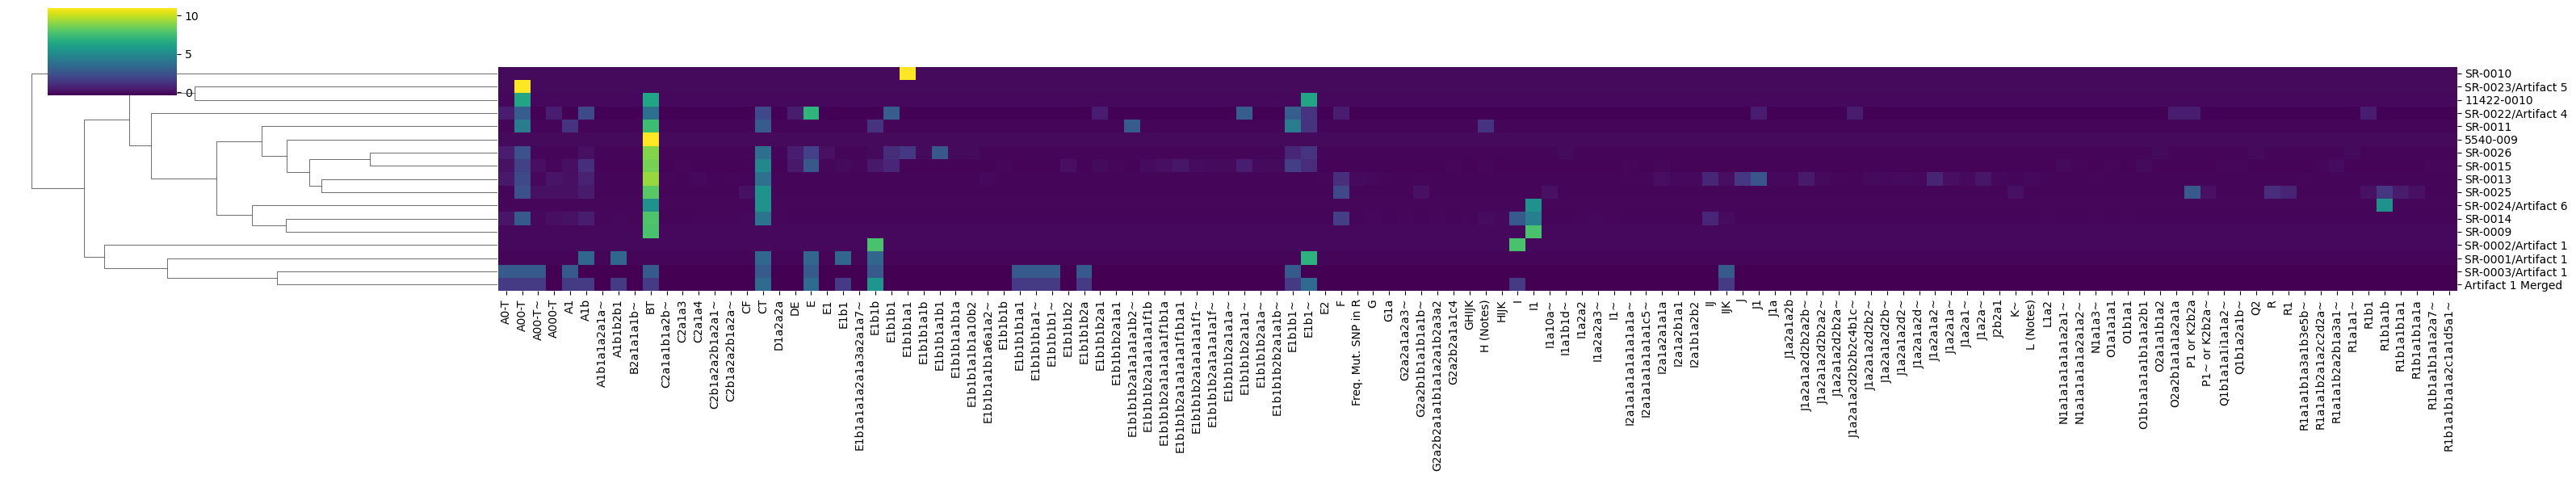

In [27]:
newCollapsed =pd.DataFrame(0, index=list(set(conDF['Sample'])), columns=sorted(list(set(conDF['hgID']))))
for row in conDF.index:
    newCollapsed.at[conDF.at[row,'Sample'], conDF.at[row,'hgID']]= int(conDF.at[row,'DerAlleleDP'])
sampleDict2={
    'SR-0001':'SR-0001/Artifact 1',
    'SR-0002':'SR-0002/Artifact 1',
    'SR-0003':'SR-0003/Artifact 1',
    '1142-0004':'1142-0004/Artifact 2',
    'SR-0022':'SR-0022/Artifact 4',
    'SR-0023':'SR-0023/Artifact 5',
    'SR-0024':'SR-0024/Artifact 6',
    'SR-0004':'SR-0004/Control',
    'Artifact 1':'Artifact 1 Merged'
}
newCollapsed_renamed = newCollapsed.rename(index=sampleDict2).copy()

import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

sns.clustermap(
    newCollapsed_renamed,
    method='average',
    metric='euclidean',
    cmap='viridis',
    figsize=(32, 6),
    col_cluster=False,
    z_score=0,   # 0 = normalize rows, 1 = normalize columns, None = raw
)
plt.savefig("/Users/loftum/Desktop/DerAlleleDP_heatmap_hierarchial_ISOGG_wArtifact.png", dpi=300, bbox_inches="tight")
plt.savefig("/Users/loftum/Desktop/DerAlleleDP_heatmap_hierarchial_ISOGG_wArtifact.pdf", dpi=300, bbox_inches="tight")
plt.show()

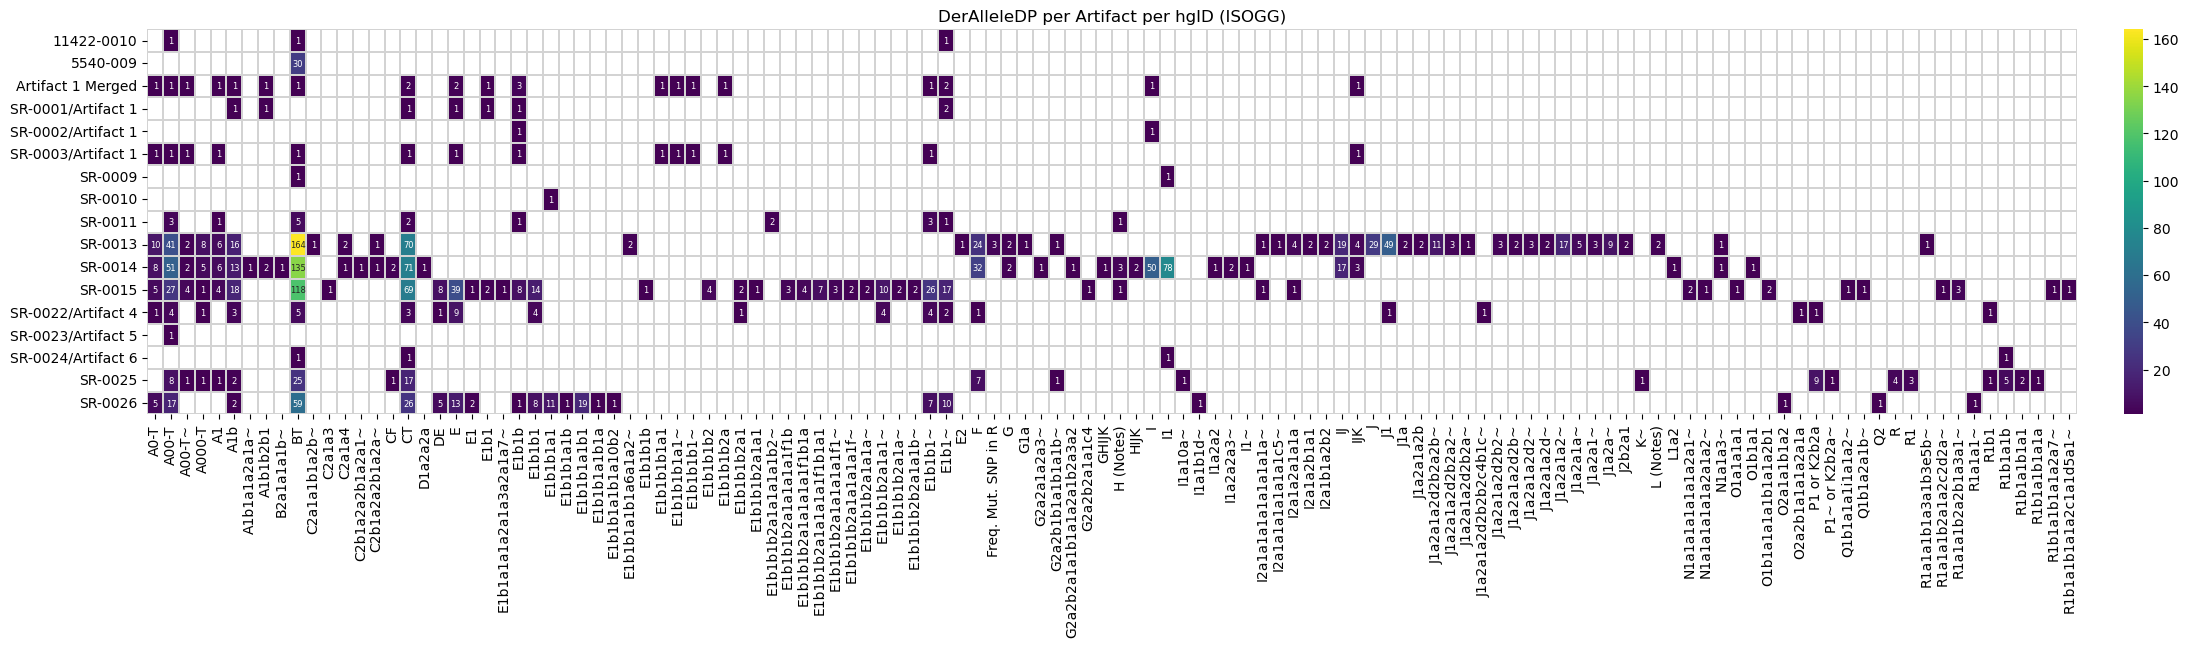

In [28]:
import numpy as np

plt.figure(figsize=(30,5))

data = newCollapsed_renamed.sort_index()

annot = data.copy()
annot = annot.astype("object")          
annot[annot == 0] = ""                  

mask = (data == 0)

sns.heatmap(
    data,
    mask=mask,
    annot=True,
    fmt="g",
    cmap="viridis",
    linewidths=.01,
    cbar_kws={"pad": 0.02},
    linecolor="lightgrey",
    annot_kws={"size": 6},
)
plt.yticks(rotation=0) 
plt.title("DerAlleleDP per Artifact per hgID (ISOGG)")
plt.savefig("/Users/loftum/Desktop/DerAlleleDP_heatmap_ISOGG_counts.png", dpi=300, bbox_inches="tight")
plt.savefig("/Users/loftum/Desktop/DerAlleleDP_heatmap_ISOGG_counts.pdf", dpi=300, bbox_inches="tight")
plt.show()